# Projeto Churn - Análise da Semana 2

**Objetivo:** EDA, Pré-processamento e Modelo Base.

## Passo 0: Preparação

Importar as bibliotecas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Passo 1: Carregar os Dados

Fazer o carregamento do Dataset.

In [ ]:
from google.colab import files

uploaded = files.upload()


file_name = list(uploaded.keys())[0]


try:
    df = pd.read_csv(file_name)
    print(f"Arquivo '{file_name}' carregado com sucesso no DataFrame 'df'!")
except Exception as e:
    print(f"Houve um erro ao ler o arquivo: {e}")

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
Arquivo 'WA_Fn-UseC_-Telco-Customer-Churn.csv' carregado com sucesso no DataFrame 'df'!


## Passo 2: Inspeção Inicial

Vamos fazer 3 verificações rápidas para entender nossos dados.

### 2.1) `df.head()` - A Primeira Visão

Vamos ver as 5 primeiras linhas para ter certeza de que os dados foram carregados corretamente e ver o nome das colunas.

In [ ]:
# Exibe as 5 primeiras linhas do DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.2) `df.info()` - O Raio-X dos Dados

Este é talvez **o comando mais importante** da inspeção inicial. Ele nos diz:
1.  Quantas linhas temos.
2.  Quais colunas têm dados faltando.
3.  Qual é o **tipo** de cada coluna (Número, Texto, etc.).

In [ ]:
# Exibe o "Raio-X" do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2.3) `value_counts()` - Entendendo nosso Alvo

Checar a coluna mais importante: `Churn`. Queremos saber qual a porcentagem de clientes que cancelou ("Sim") vs. os que ficaram ("Não").

In [ ]:
# Calcula a porcentagem de cada valor na coluna 'Churn'
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Distribuição da nossa coluna 'Churn':")
print(churn_percentage)

Distribuição da nossa coluna 'Churn':
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


---

## Passo 3: Análise Visual


### Gráfico 1: Tipo de Contrato vs. Churn

Vamos usar um gráfico de contagem para ver dentro de cada tipo de contrato, quantos clientes deram Churn ('Yes') e quantos ficaram ('No').

Analisando Contrato vs Churn...


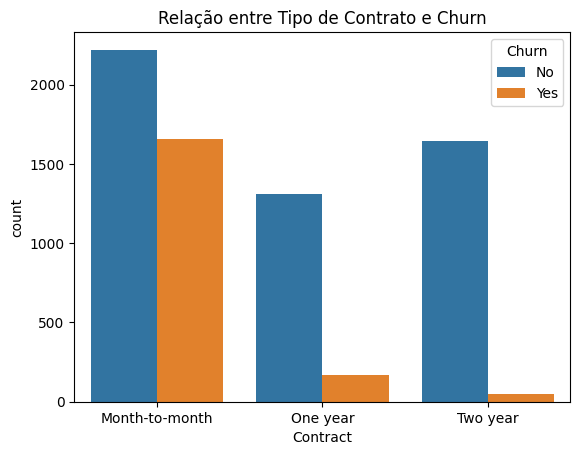

In [ ]:
print("Analisando Contrato vs Churn...")
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Relação entre Tipo de Contrato e Churn')
plt.show()

### Gráfico 2: Cobrança Mensal vs. Churn

Vamos usar um boxplot para comparar a distribuição das cobranças mensais entre quem deu Churn e quem não deu.

Analisando Cobrança Mensal vs Churn...


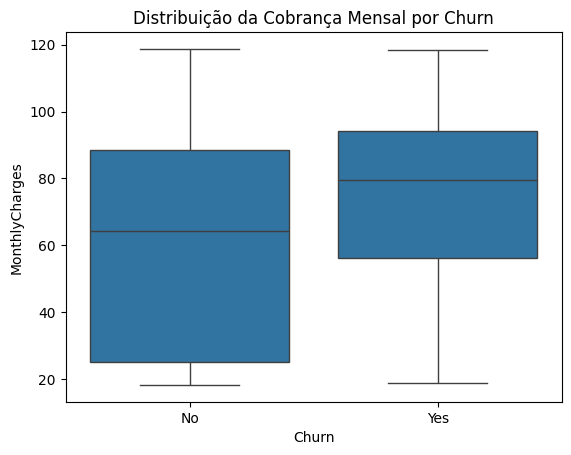

In [ ]:
print("Analisando Cobrança Mensal vs Churn...")
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Distribuição da Cobrança Mensal por Churn')
plt.show()

### Gráfico 3: Tempo de Casa (Tenure) vs. Churn

Vamos fazer a mesma análise de boxplot para o 'tenure' (tempo de casa em meses).

Analisando Tempo de Casa (Tenure) vs Churn...


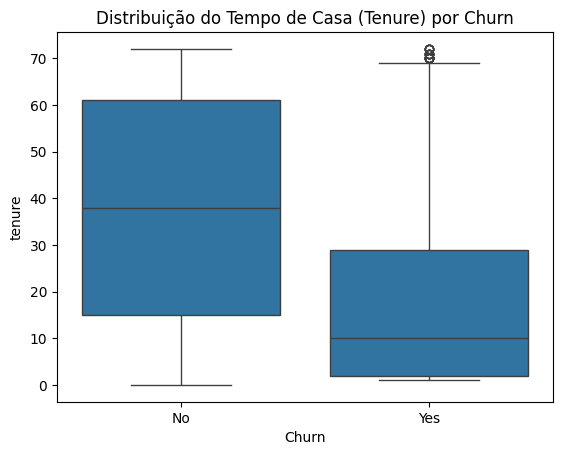

In [ ]:
print("Analisando Tempo de Casa (Tenure) vs Churn...")
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Distribuição do Tempo de Casa (Tenure) por Churn')
plt.show()

## Passo 4: Pré-processamento e Feature Engineering

Agora vamos "limpar a casa". O modelo de machine learning não entende texto (como 'Yes', 'No', 'Male', 'Female'). Além disso, temos que corrigir aquela coluna `TotalCharges` que o `df.info()` nos mostrou que é um `object` (texto).

### 4.1) Corrigindo `TotalCharges`

In [ ]:
# O pd.to_numeric(..., errors='coerce') é um truque: ele tenta transformar em número.
# Se ele não conseguir (porque o valor é um espaço em branco ' '), ele força o valor a virar 'NaN' (Nulo).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Agora, vamos checar quantos valores nulos (NaN) nós criamos
print(f"Total de valores nulos em TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Como são poucos, podemos simplesmente apagar essas linhas do dataset
df.dropna(subset=['TotalCharges'], inplace=True)

# Vamos checar de novo se limpamos tudo
print(f"Valores nulos restantes: {df['TotalCharges'].isnull().sum()}")

Total de valores nulos em TotalCharges: 11
Valores nulos restantes: 0


### 4.2) Transformando Colunas de Texto em Números

Vamos transformar todas as colunas que são texto (`object`) em números.
Vamos também apagar a `customerID`, pois ela é só um código de identificação e não ajuda o modelo a prever.

In [ ]:
# Primeiro, vamos criar uma cópia limpa do df para o modelo
df_modelo = df.copy()

# Apagando a coluna inútil
df_modelo = df_modelo.drop('customerID', axis=1)

# Usando o pd.get_dummies() - é a forma mais fácil de transformar texto em colunas numéricas (0 ou 1)
# Ele vai pegar uma coluna como 'Contract' e criar 3 novas: 'Contract_Month-to-month', 'Contract_One-year', 'Contract_Two-year'
# E vai preencher com 1 ou 0 para cada cliente.
df_modelo = pd.get_dummies(df_modelo, drop_first=True) # drop_first=True é uma boa prática para evitar redundância

print("DataFrame pronto para o modelo:")
df_modelo.head() # Veja como a coluna 'Churn_Yes' apareceu (valendo 0 ou 1) e as outras de texto sumiram.

DataFrame pronto para o modelo:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


## Passo 5: Implementação do Algoritmo Base

Vamos treinar nosso primeiro modelo. Vamos usar uma **Árvore de Decisão**.

In [ ]:
# Importando as ferramentas do scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 1. Separar os dados em X (Features) e y (Alvo)

# X = são TODAS as colunas que o modelo vai usar para aprender (as "perguntas")
# y = é a coluna que queremos prever (o "gabarito")

X = df_modelo.drop('Churn_Yes', axis=1)
y = df_modelo['Churn_Yes']           # O gabarito é SÓ a coluna Churn_Yes (0 ou 1)

print("Dados separados em X e y.")

Dados separados em X e y.


In [ ]:
# 2. Separar em dados de Treino e Teste
# Vamos usar 80% dos dados para o modelo aprender (treinar)
# E vamos guardar 20% para testar se ele aprendeu direito (a "prova final")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Temos {len(X_train)} linhas para treino e {len(X_test)} linhas para teste.")

Temos 5625 linhas para treino e 1407 linhas para teste.


In [ ]:
# 3. Criar e Treinar o Modelo Base
modelo_arvore = DecisionTreeClassifier(max_depth=5, random_state=42) # max_depth=5 para ela não ficar muito complexa

# Treinando o modelo com os dados de treino
modelo_arvore.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado com sucesso!")

Modelo de Árvore de Decisão treinado com sucesso!


In [ ]:
# 4. Fazer Previsões e Checar a Acurácia
# Agora vamos usar o modelo treinado para ele prever os resultados dos dados de teste (que ele nunca viu)
previsoes = modelo_arvore.predict(X_test)

# Vamos comparar as previsões do modelo com o gabarito real (y_test)
acuracia = accuracy_score(y_test, previsoes)

print("--- RESULTADO DO MODELO BASE ---")
print(f"A acurácia do nosso primeiro modelo é: {acuracia * 100:.2f}%")
print(f"Isso significa que o modelo acertou a previsão para {acuracia * 100:.2f}% dos clientes do grupo de teste.")

--- RESULTADO DO MODELO BASE ---
A acurácia do nosso primeiro modelo é: 77.54%
Isso significa que o modelo acertou a previsão para 77.54% dos clientes do grupo de teste.


Conclusão da Semana 2

1.  **Fizemos o EDA** e descobrimos que 'Contrato Mensal', 'Cobrança Alta' e 'Pouco Tempo de Casa (tenure)' são os principais indicadores de Churn.
2.  **Limpamos os dados** (TotalCharges) e transformamos tudo em números (`get_dummies`).
3.  **Criamos um modelo base** de Árvore de Decisão e tivemos nossa primeira acurácia!